In [2]:
import requests
import fiona
from geocube.api.core import make_geocube
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_bounds
from matplotlib import pyplot as plt
import numpy as np
import time
import os
import pandas as pd

In [3]:
gee = rasterio.open("singapore_gee_nir.tif")
gee.read(4)

array([[0.29405, 0.29835, 0.28865, ..., 0.3992 , 0.374  , 0.3737 ],
       [0.2579 , 0.25015, 0.2454 , ..., 0.3046 , 0.3365 , 0.3245 ],
       [0.25585, 0.2584 , 0.2667 , ..., 0.2832 , 0.3068 , 0.2996 ],
       ...,
       [0.0284 , 0.0283 , 0.0298 , ..., 0.2515 , 0.2288 , 0.2129 ],
       [0.0274 , 0.0291 , 0.029  , ..., 0.3091 , 0.3182 , 0.2375 ],
       [0.0278 , 0.0266 , 0.02875, ..., 0.3112 , 0.33   , 0.2503 ]],
      dtype=float32)

In [7]:
nir = np.float32(gee.read(4))
blue = np.float32(gee.read(3))
green = np.float32(gee.read(2))
red = np.float32(gee.read(1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0065..1.8384].


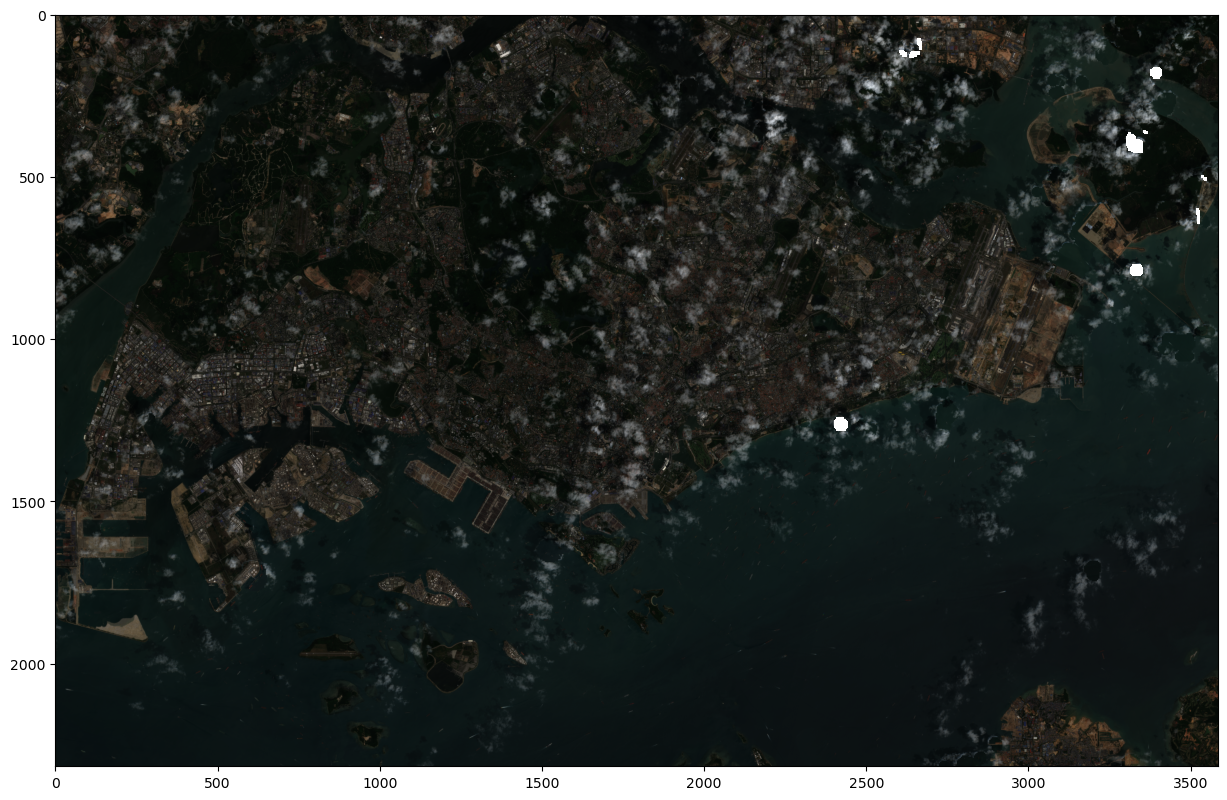

In [21]:
plt.figure(figsize=(15, 15))
# stack different layer images
vis = np.dstack((red,green, blue))
plt.imshow(vis)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1e-04..1.7408].


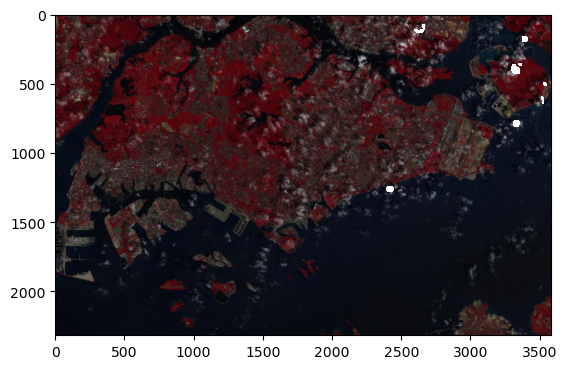

In [10]:
# stack different layer images
cir = np.dstack((nir,red,green))
plt.imshow(cir)

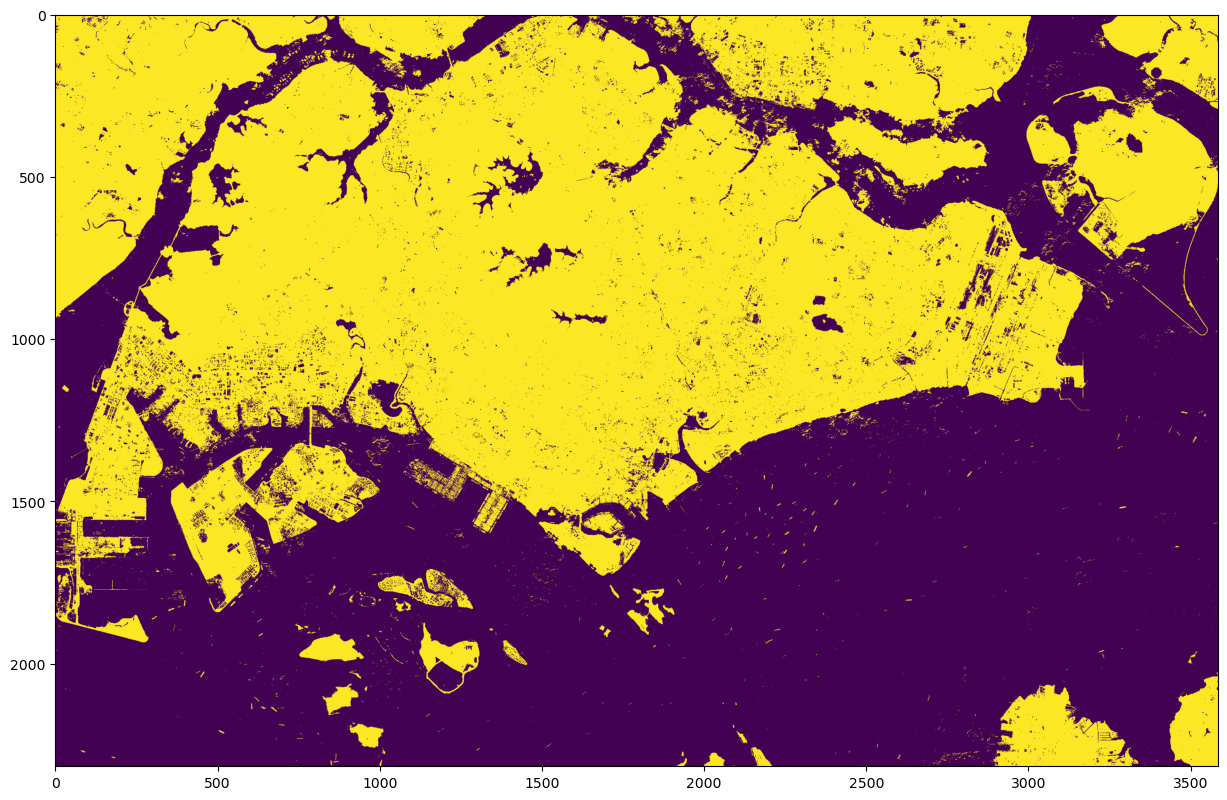

In [11]:
ndvi = (nir - red)/(nir + red + 0.000001)

plt.figure(figsize=(15, 15))

veg = np.zeros((ndvi.shape[0], ndvi.shape[1]))
veg[ndvi > 0] = 1

plt.imshow(veg)

plt.show()

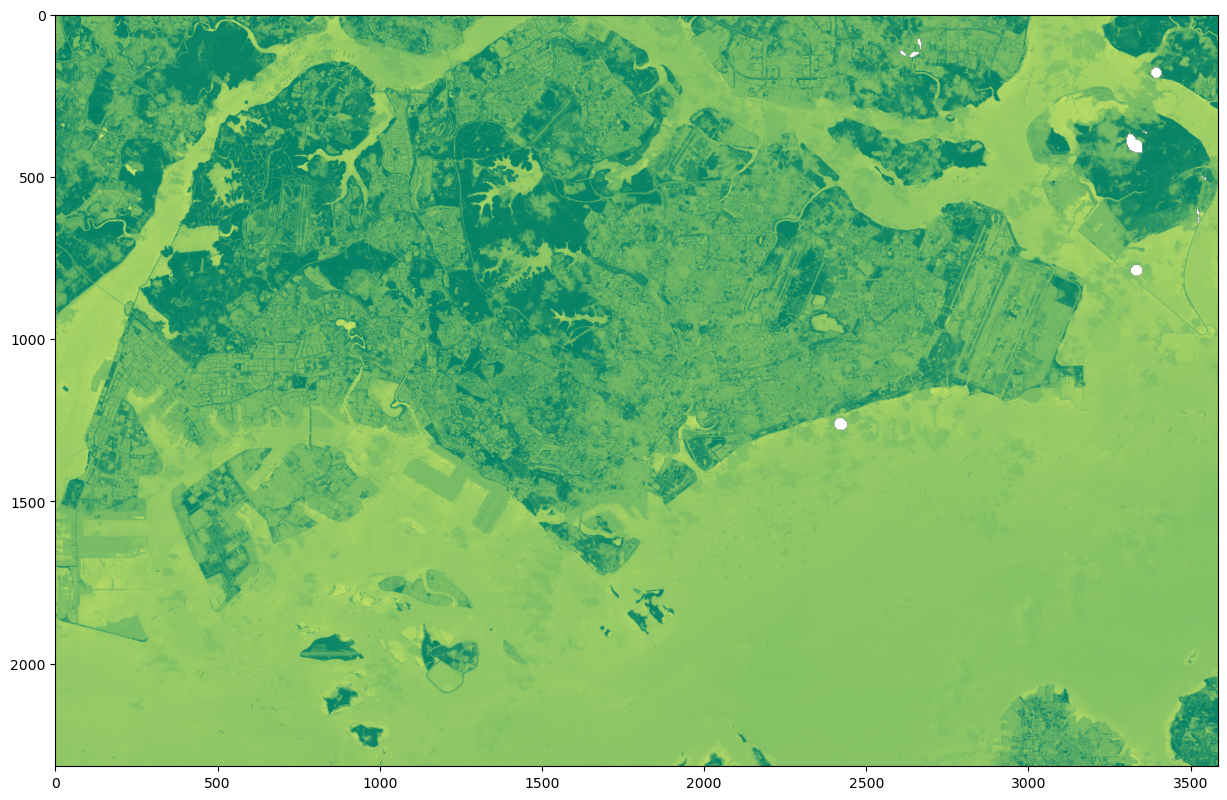

In [20]:
plt.figure(figsize=(15, 15))

img = plt.imshow(-ndvi, 
           cmap=plt.get_cmap('summer'))
plt.show()

In [ ]:
with fiona.open("sg_data/MP14_SUBZONE_WEB_PL.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(input_value_raster) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "compress": 'lzw',
                 "transform": out_transform})

with rio.open(out_raster, "w", **out_meta) as dest:
    dest.write(out_image)    

In [15]:
with rasterio.open(
    'gee_nvdi.tif',
    'w',
    **gee.meta
) as dst:
    dst.write(ndvi, 1)